利用主成分综合评价全国各地区水泥制造业规模以上企业的经济效益原始数据来源于2014年《中国水泥年鉴》。

<Axes: >

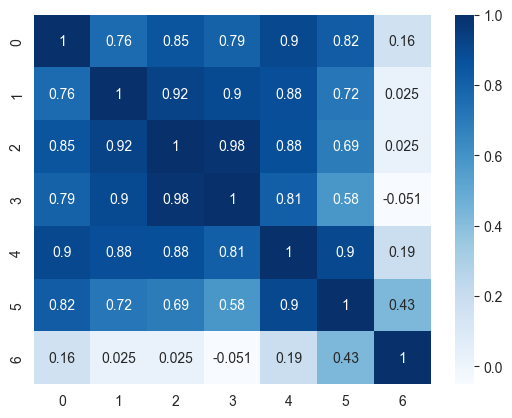

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 从相关矩阵出发进行主成分分析
dataset = pd.read_table('./datas/例5-2.txt', index_col=0, sep='\t')
labels = dataset.columns
Xscale = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)
# 计算相关矩阵Correlation Matrix
cor_mat = np.corrcoef(Xscale, rowvar=False)
sns.heatmap(cor_mat, cmap='Blues', annot=True)

输出变量之间的相关性。结果显示除X7与各变量的相关性不强外，其他变量之间均存在较强的相关关系，因此原始数据适合做主成分分析。

In [2]:
eig_value, eig_vector = np.linalg.eig(cor_mat)
# 将特征值与特征向量对应起来，并对其进行排序
eigdf = pd.DataFrame(eig_vector.T).join(pd.DataFrame(eig_value, dtype=float, columns=["eig_value"]))
eigdf.index = labels
eigdf = eigdf.sort_values("eig_value")[::-1]
eigdf['cumlam'] = eigdf['eig_value'].apply(lambda x: x/eigdf['eig_value'].sum())
eigdf['ccve'] = eigdf['cumlam'].cumsum()
eigdf[['eig_value','cumlam','ccve']]

,eig_value,cumlam,ccve
X1,5.163389,0.737627,0.737627
X2,1.209144,0.172735,0.910362
X3,0.341894,0.048842,0.959204
X4,0.194795,0.027828,0.987032
X5,0.049062,0.007009,0.994041
X6,0.034150,0.004879,0.998919
X7,0.007566,0.001081,1.000000


结果可以看到，本例保留了前两个主成分，它们解释了全部变量总方差的91.036%，说明这2个主成分代表原来的7个指标评价企业的经济效益已经足够。

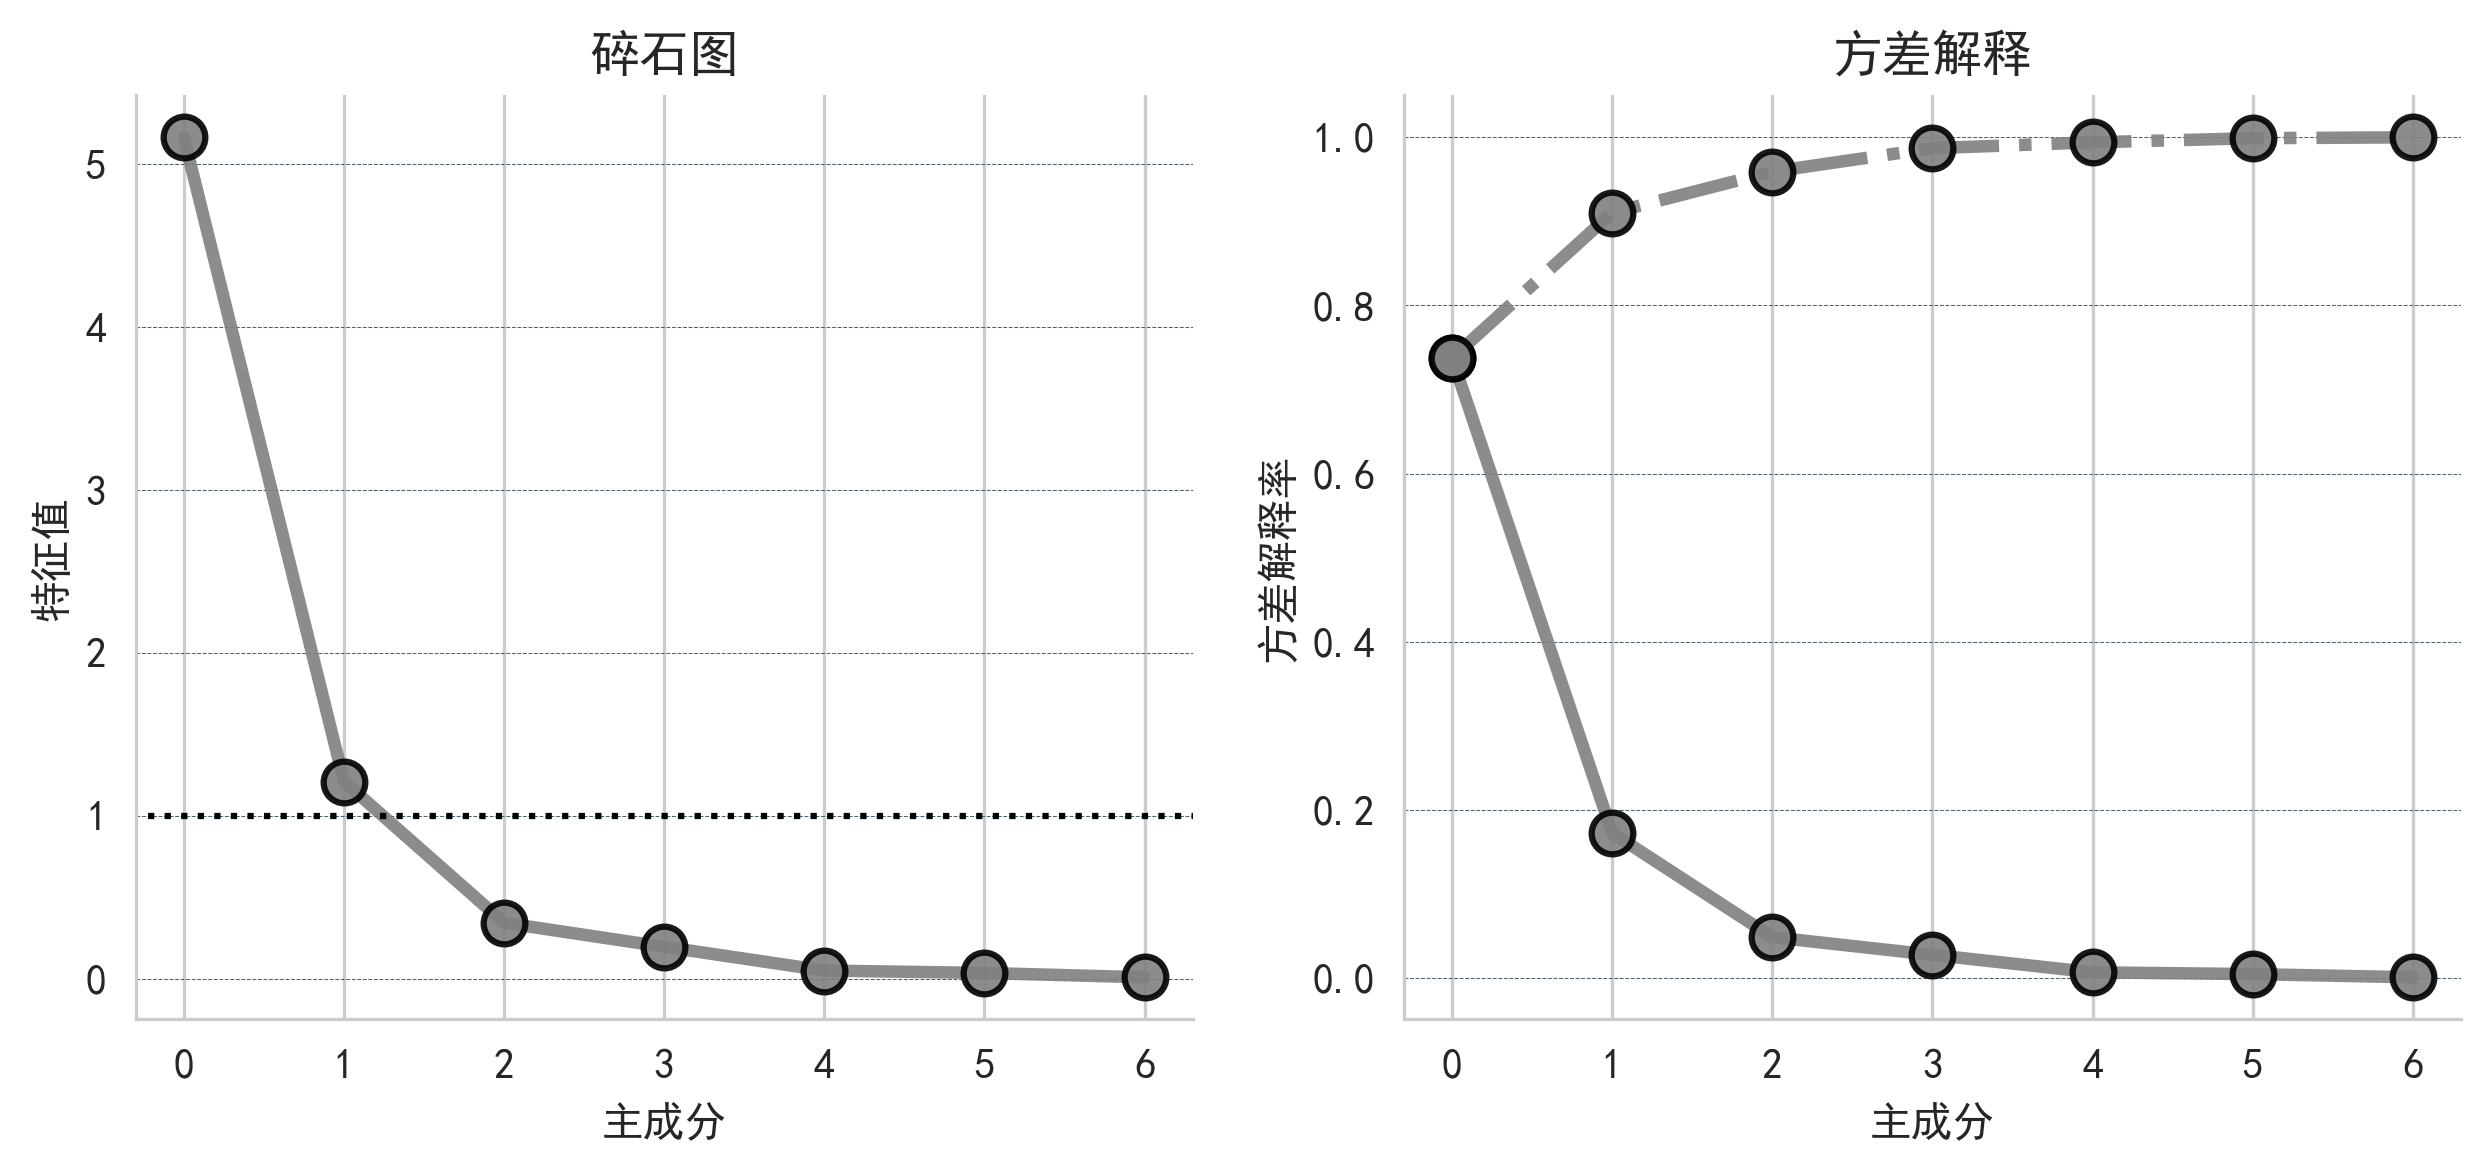

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号
# 输出一下碎石图
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), dpi=300)
Eigvalue = eigdf[['eig_value','cumlam','ccve']]
names = [i for i in range(len(Eigvalue))]

ax1.plot(names, Eigvalue['eig_value'], linestyle='-', linewidth=3, color='grey', marker = "o",markeredgecolor='k',alpha=0.9,markersize='10',markeredgewidth=1.5)

ax2.plot(names, Eigvalue['cumlam'],linestyle='-', linewidth=3, color='grey', marker = "o",markeredgecolor='k',alpha=0.9,markersize='10',markeredgewidth=1.5)
ax2.plot(names, Eigvalue['ccve'],linestyle='-.', linewidth=3, color='grey', marker = "o",markeredgecolor='k',alpha=0.9,markersize='10',markeredgewidth=1.5)
ax1.axhline(y=Eigvalue['eig_value'].sum()/len(Eigvalue['eig_value']), xmin=-1.5, xmax=10, color='black', linestyle=':')

ax1.grid(ls = "--",axis='y', lw = 0.25, color = "#4E616C")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel("主成分")
ax1.set_ylabel("特征值")
ax1.set_title("碎石图", fontsize=12)

ax2.grid(ls = "--", axis='y', lw = 0.25, color = "#4E616C")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel("主成分")
ax2.set_ylabel("方差解释率")
ax2.set_title("方差解释", fontsize=12)

plt.show()

In [4]:
# 提取一个主成分用于计算得分情况。
n_pcl=1
print(f'假如我们只保留一个主成分，则累计方差解释率为:{ eigdf["ccve"].iloc[n_pcl-1]:.3%}，勉强也可以，这里用来做案例。')
pcl_vector = eigdf.iloc[:, :dataset.shape[1]].T.iloc[:, :n_pcl]
print(f'特征向量为：\n{list(pcl_vector.iloc[:, n_pcl-1].round(4))}')
ss = [f'{pcl_vector.iloc[:, n_pcl-1][j]:+.3f}' + f'*X{j+1}' for j in range(len(pcl_vector.iloc[:, n_pcl-1]))]
print(f'主成分表达式：Y1={"".join(ss)}')
loadings = pcl_vector.iloc[:, n_pcl-1]*np.sqrt(eig_value[n_pcl-1])
print(f'因子载荷矩阵：\n{list(loadings.round(4))}')
print('主成分Y：')
Y = Xscale.values.dot(pcl_vector.iloc[:, n_pcl-1])
pd.Series(Y,index=dataset.index).sort_values(ascending=False)

假如我们只保留一个主成分，则累计方差解释率为:73.763%，勉强也可以，这里用来做案例。
特征向量为：
[0.4071, 0.4096, 0.4212, 0.3999, 0.4263, 0.3769, 0.0735]
主成分表达式：Y1=+0.407*X1+0.410*X2+0.421*X3+0.400*X4+0.426*X5+0.377*X6+0.074*X7
因子载荷矩阵：
[0.925, 0.9306, 0.9572, 0.9087, 0.9687, 0.8564, 0.1671]
主成分Y：


地区
山东     4.770580
河南     4.049670
江苏     3.615331
河北     3.492990
四川     2.181136
安徽     2.083389
湖北     1.862018
广东     1.818569
浙江     1.788433
吉林     1.642415
江西     0.527362
湖南     0.503000
广西     0.338820
辽宁     0.179882
新疆    -0.131422
云南    -0.170936
贵州    -0.304797
内蒙古   -0.502928
重庆    -0.628661
黑龙江   -0.781065
陕西    -0.908212
福建    -1.077652
山西    -1.366870
甘肃    -1.793673
青海    -2.623050
海南    -2.750894
宁夏    -2.882470
天津    -3.003073
西藏    -3.091577
上海    -3.320677
北京    -3.515640
dtype: float64

主成分分析的关键在于能否对主成分赋予新的意义，并给出合理的解释，这个解释应根据主成分的计算结果结合定性分析来进行。

主成分分析是原来变量(标准化的)的线性组合，在这个组合中各变量的系数有大有小，有正有负，有的大小相当，因而不能简单地认为这个主成分是某个原始变量的属性的作用。线性组合中某变量的系数的绝对值大表明该主成分主要综合了该变量的信息，如果有几个变量的系数大小相当，则应认为这一主成分是这几个变量的总和，这几个变量综合在一起具有怎样的经济意义，要结合经济专业知识，给出恰如其分的解释，才能达到深刻分析经济成因的目的。

通常为了分析各样品在主成分上所反映的经济意义方面的情况，还需将原始数据代人主成分表达式计算出各样品的主成分得分，根据各样品的主成分得分就可以对样品进行大致分类或者排序。但是计算主成分得分是需要注意如下问题：

（1）当提取主成分不为1时，目前常用的方法是以每个主成分Y的方差贡献率作为权重，对主成分$Y_1,Y_2,...,Y_p$进行线性组合构造一个综合评价函数，依据计算出的F值大小进行排序或分类划级。这一方法目前在国内一些专业文献中都在使用，但在实践中有时应用效果并不理想，一直以来存在较大争议，主要原因是生成主成分的特征向量的各分量符号不一致，很难进行排序评价因此。

（2）当提取主成分为为时，可以只用第一主成分作评价指标计算综合评分。理由是第一主成分与原变量综合相关度最高，并且第一主成分对应于数据变异最大的方向，也就是使数据信息损失最小、精度最高的一维综合变量。值得指出的是，使用这种方法是有前提条件的，首先，方差贡献率不应该太小，怎么也得70%以上吧。其次，要求系数矩阵符号应该一致（即全为正或者全为负）。也就是要求所有评价指标变量都正/负相关的时候，第一主成分才可以用来进行排序。如果系数中有正有负或近似为零，则说明第一主成分是无序指数，不能用作排序评价指标。如果第一主成分系数全为正，则第二、第三……主成分由于与第一主成分正交系数肯定有正有负，因而一般来说均为无序指数（指的是第二第三主成分），不能用作排序评价指标。

注意得分表的各地区得分中有许多地区的得分是负数，但并不表明这些地区的经济效益就为负，这里的正负仅表示该地区与平均水平的位置关系，经济效益的平均水平算作零点。这是我们在整个过程中将数据标准化的结果。

山东、河南、江苏、河北、四川、安徽、湖北、广东、浙江和吉林得分较高，可以划分为一类，这些省区的规模以上的水泥企业的经济效益较好，企业整体规模大且收人高，盈利能力强；
江西、湖南、广西、辽宁、新疆、云南、贵州、内蒙古、重庆、黑龙江的得分均处于一般水平，可以划分为1类，说明这些地区的规模以上的水泥企业的综合效益较差。

陕西、福建、山西、甘肃、青海、海南、宁夏、天津、西藏、上海、北京得分均为负值，且较小，可以划分为1类，这些地区的规模以上的水泥企业的经济效益较差，企业整体规模小且盈利能力弱，尤其是北京、上海地区的水泥企业的经济效益最差，主要是由于北京、上海地区较大规模的水泥企业比较少。

In [5]:
# 主成分特征向量
# 获取与特征值对应的特征向量（排序后）
eig_vector = eigdf.iloc[:, :dataset.shape[1]].T
n_pcl = 2
pcl_vector = eig_vector.iloc[:, :n_pcl]
# 不知道为啥，Python计算的特征向量有时候第一个主成分对应的特征向量会是反的
pcl_vector['X1'] = pcl_vector['X1']
print(f'前{n_pcl}个主成分：')
for i in range(pcl_vector.shape[1]):
    k = pcl_vector.iloc[:, i]
    ss = [f'{k[j]:+.3f}' + f'*X{j+1}' for j in range(len(k))]
    print(f'Y{i+1}={"".join(ss) if "".join(ss).startswith("-") else "".join(ss)[1:]}')
pcl_vector.columns = [f'PCL{i+1}' for i in range(n_pcl)]
pcl_vector.index = labels
pcl_vector

前2个主成分：
Y1=0.407*X1+0.410*X2+0.421*X3+0.400*X4+0.426*X5+0.377*X6+0.074*X7
Y2=0.044*X1-0.155*X2-0.178*X3-0.269*X4+0.070*X5+0.360*X6+0.858*X7


C:\Users\shelhen\AppData\Local\Temp\ipykernel_15480\692253484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcl_vector['X1'] = pcl_vector['X1']


,PCL1,PCL2
X1,0.407077,0.043645
X2,0.409557,-0.155001
X3,0.421245,-0.178308
X4,0.399915,-0.269459
X5,0.426297,0.070454
X6,0.376876,0.359508
X7,0.073535,0.857588


In [6]:
# 计算因子载荷矩阵
# 取出前两个特征值，开方后，将其对角化
eigmat = np.diag(np.sqrt(eig_value[:n_pcl]))
# 特征向量分别矩阵乘 对角化矩阵
loadings = pcl_vector.dot(eigmat)
# 载荷矩阵
loadings

,0,1
X1,0.925004,0.047992
X2,0.930640,-0.170441
X3,0.957198,-0.196070
X4,0.908731,-0.296301
X5,0.968678,0.077472
X6,0.856380,0.395319
X7,0.167094,0.943014


主成分的经济意义可以由各线性组合中系数较大的几个指标的综合意义来确定，也可以分析因子载荷矩阵。
企业单位个数X1；流动资产合计X2；资产总额X3；负债总额X4；主营业务收入X5；利润总额X6；销售绿润率X7

主成分Y1中，除销售利润率的系数较小外，其他变量的系数大小相当，因此主成分Y1综合反映水泥企业的整体规模和收入水平。
主成分Y2中，变量利润总额和销售利润率的系数较大，后者的系数最大，其他变量的系数较小，因此主成分Y2主要反映企业的盈利能力。

这两个主成分从企业规模和企业盈利能力两个方面刻画企业经济效益，用它们来考核企业经济效益有91.036%的可靠性。

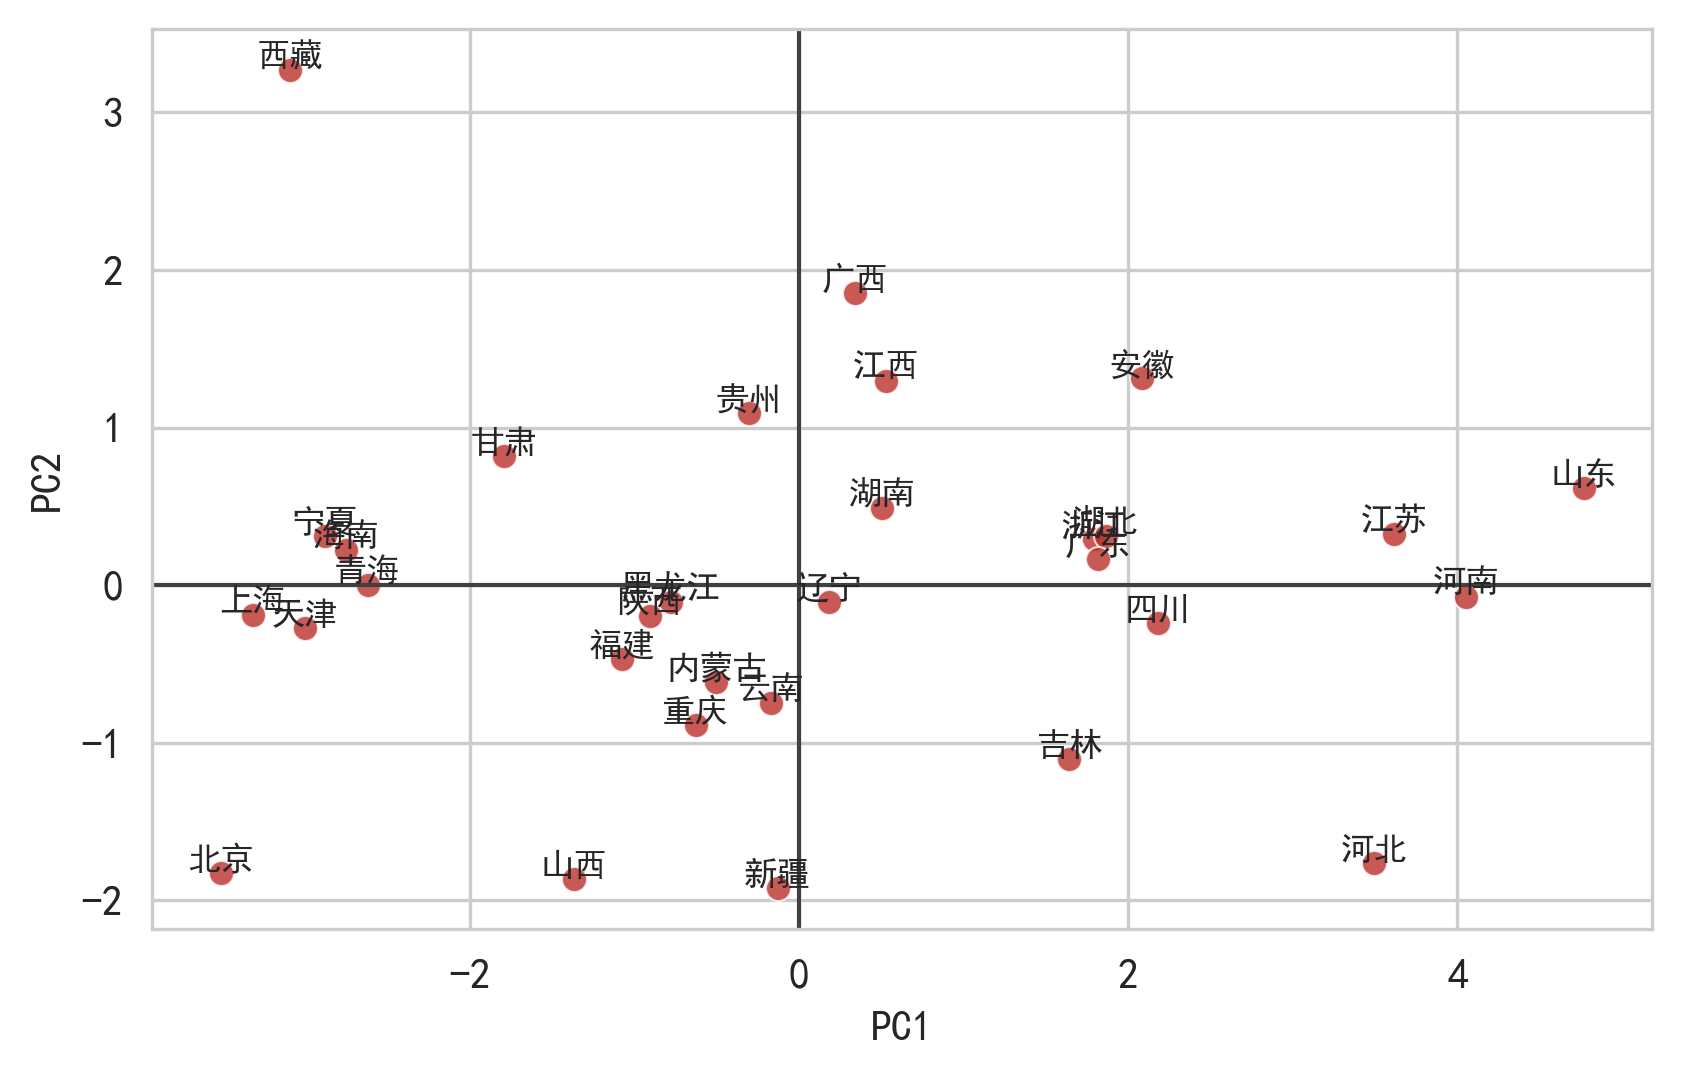

In [7]:
# 无论前面是否进行标准化，计算因子得分还是需要标准化。
fig = plt.figure(figsize=(5, 3),dpi=300)
ax = fig.add_axes([0,0,1,1])

scores = pd.DataFrame(Xscale.values.dot(pcl_vector), index=dataset.index, columns=[f'PC{i+1}' for i in range(n_pcl)])
sns.scatterplot(x='PC1', y='PC2', data=scores,c='#BC302A',alpha=0.8,ax=ax)

for i in range(scores.shape[0]):
    ax.text(scores['PC1'].iloc[i], scores['PC2'].iloc[i]+0.001, scores.index[i], ha='center', va='bottom', fontsize=8)
ax.axhline(y=sum(scores['PC1'])/31 , color='#404040' , linestyle='-',linewidth=1)
ax.axvline(x=sum(scores['PC2'])/31, color='#404040' , linestyle='-',linewidth=1)
plt.show()

当有两个主成分时，可以将各样品的主成分得分在平面直角坐标系上描出来，就可得到各样品的分布情况。

由图可知，分布在第一象限的地区是广西、江西、安徽、湖南、浙江、广东、湖北、江苏和山东，说明这些省区的规模以上的水泥企业的经济效益较好，企业整体规模大且收人高，盈利能力强;分布在第三象限的地区是黑龙江、陕西、福建、云南、重庆、山西、新疆、上海、天津、北京，说明这些地区的规模以上的水泥企业的经济效益较差，企业整体规模小且盈利能力弱，尤其是北京地区的水泥企业的经济效益最差，主要是由于北京地区较大规模的水泥企业比较少。

虽然可以根据各地区的主成分得分对各地区规模以上工业企业的经济效益或规模以上水泥企业的经济效益进行比较分析或分类研究，但因为此处主成分的意义并不十分明朗，可以利用因子分析进一步研究，能够得到更合理、更容易解释的结果。

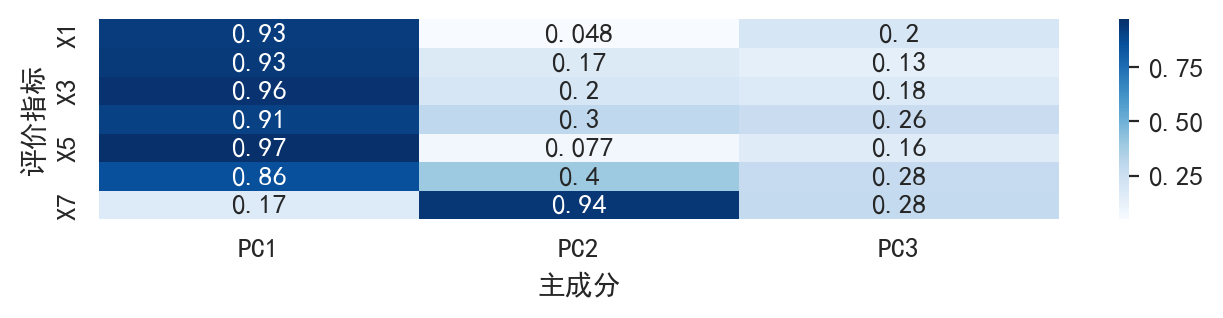

In [8]:
n_pcl = 3
eig_vector = eigdf.iloc[:, :dataset.shape[1]].T
pcl_vector = eig_vector.iloc[:, :n_pcl]
eigmat = np.diag(np.sqrt(eig_value[:n_pcl]))
# 特征向量分别矩阵乘 对角化矩阵
loadings = pcl_vector.dot(eigmat)
# 载荷矩阵
result = pd.DataFrame(loadings.values, index=labels,columns=[f'PC{i+1}' for i in range(n_pcl)])
fig = plt.figure(figsize=(6, 1),dpi=200)
ax = fig.add_axes([0,0,1,1])
sns.heatmap(result.abs(), cmap='Blues', annot=True)
ax.set_xlabel('主成分')
ax.set_ylabel('评价指标')
plt.show()

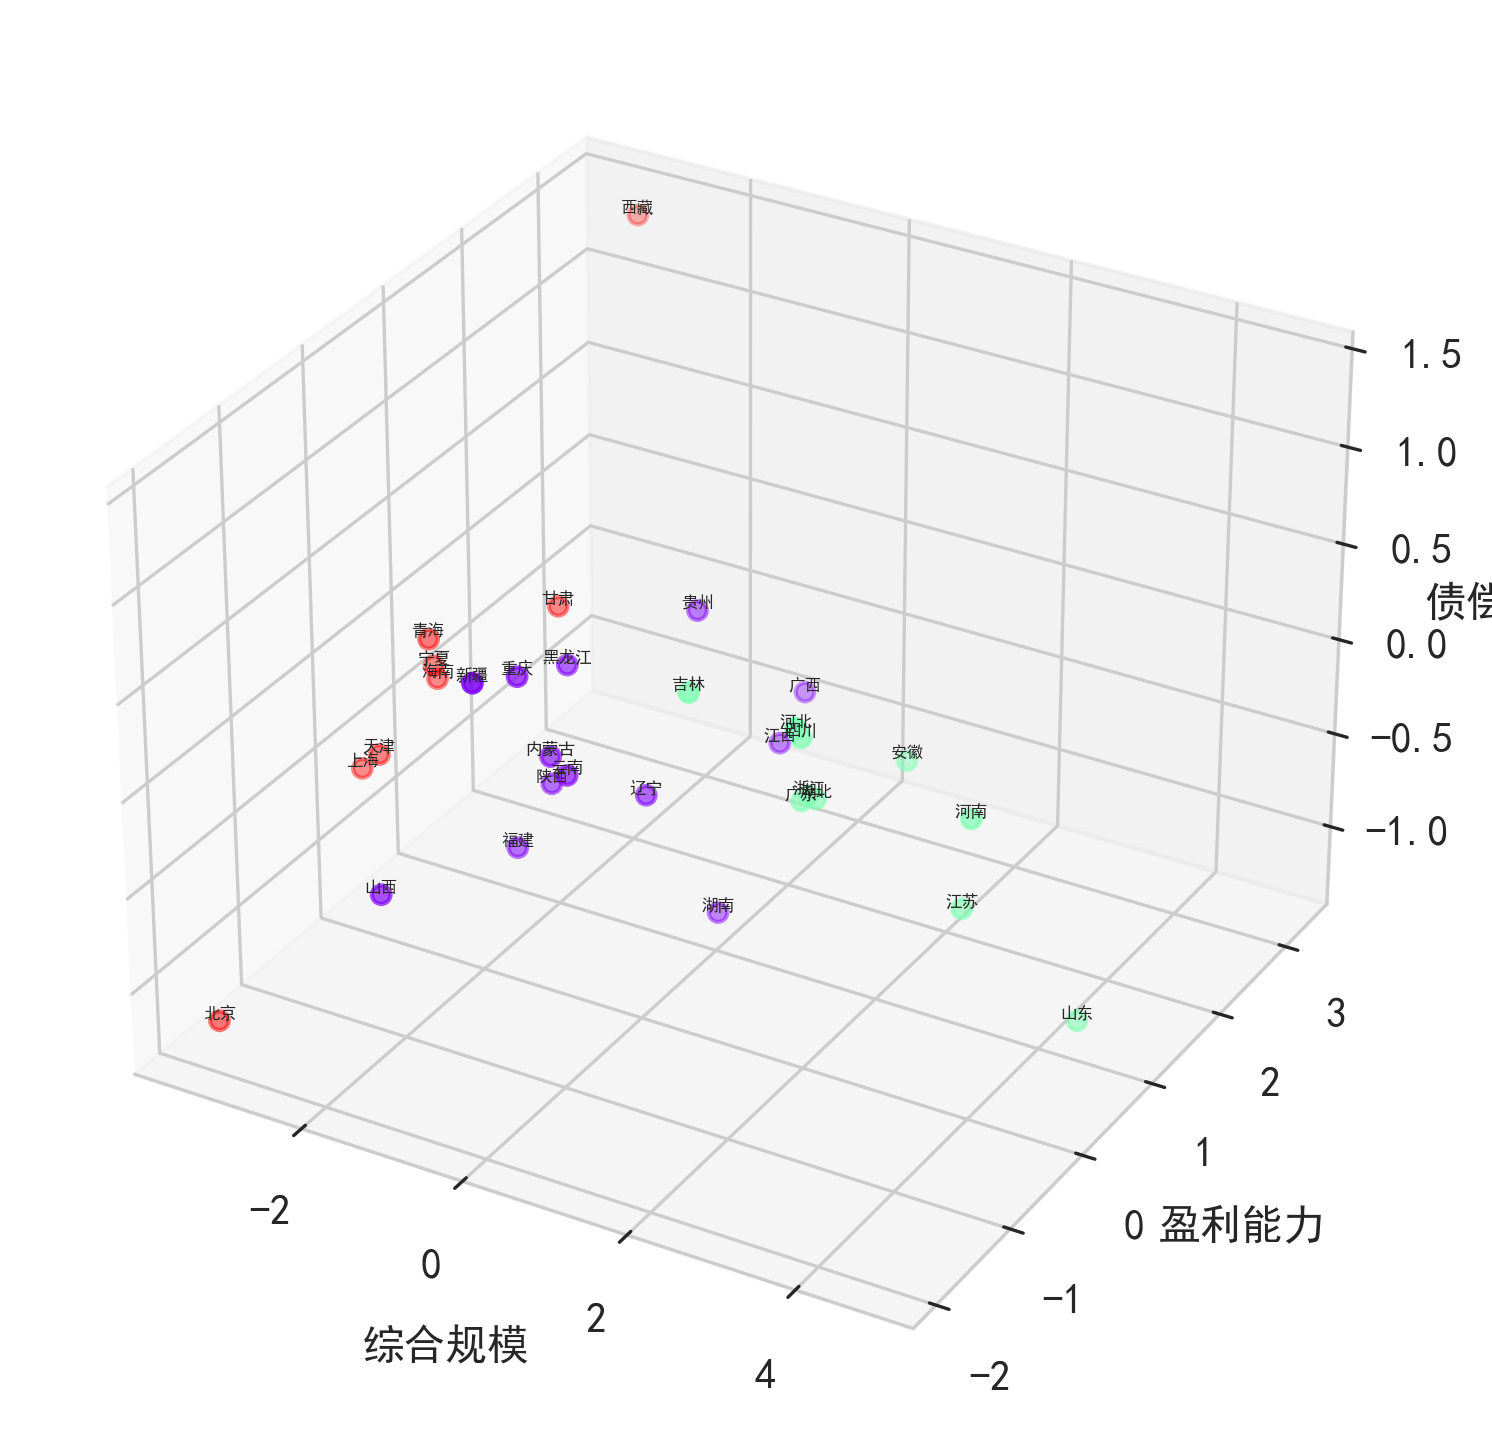

In [9]:
# 实际上还可以保留更多主成分，这里以保留三个为例
from sklearn.cluster import KMeans
# K均值聚类
model = KMeans(n_clusters=3, random_state=1, n_init=20)
model.fit(Xscale)
fig = plt.figure(figsize=(10, 6),dpi=300) 
scores = pd.DataFrame(Xscale.values.dot(pcl_vector), index=dataset.index, columns=[f'PC{i+1}' for i in range(n_pcl)])

ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores['PC1'], scores['PC2'], scores['PC3'],c=model.labels_, cmap='rainbow')
for i in range(scores.shape[0]):
    ax.text(scores['PC1'].iloc[i], scores['PC2'].iloc[i],scores['PC3'].iloc[i], scores.index[i], ha='center', va='bottom', fontsize=4)

ax.set_xlabel('综合规模')
ax.set_ylabel('盈利能力')
ax.set_zlabel('债偿能力')

plt.show()

可以看出来北京、上海、天津、宁夏、海南、甘肃等地区数值比较异常，被划分为1类。紫色地区企业属于效益比较差的企业，绿色地区企业效益相对较好